In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
%matplotlib inline

### Loading the data from zip file

In [21]:
import zipfile
zipfile.ZipFile('Ch7/07_02/names.zip').extractall('.')

In [22]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [23]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [24]:
names_2011 = pd.read_csv('names/yob2011.txt',header = None)

In [25]:
names_2011.head()

,0,1,2
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


### Loading data from all years into a dataframe

In [26]:
names_all = pd.DataFrame(columns = ['name','sex','occurences','year'])
for i in range(1880,2015):
        current_year = pd.read_csv('names/yob'+str(i)+'.txt',header = None)
        current_year.columns = ['name','sex','occurences']
        current_year['year'] = [i]*current_year.shape[0]
        names_all = names_all.append(current_year)

In [27]:
names_all.head()

,name,sex,occurences,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [28]:
names_all.tail()

,name,sex,occurences,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [29]:
names_all_indexed = names_all.set_index(['sex','name','year']).sort_index()

In [30]:
names_all_indexed.head(10)

occurences
sex name      year           
F   Aabha     2011          7
              2012          5
              2014          9
    Aabriella 2008          5
              2014          5
    Aaden     2009          5
    Aadhira   2012          6
              2013         10
              2014         13
    Aadhya    2007         10

In [31]:
n = names_all.groupby('sex')['name'].nunique()

In [32]:
n

sex
F    64911
M    39199
Name: name, dtype: int64

### There are significantly larger female names than male names

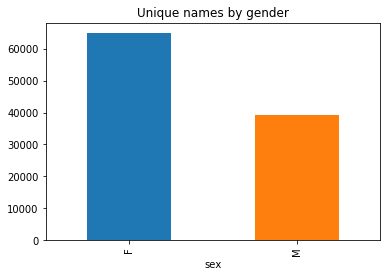

In [33]:
n.plot.bar(title='Unique names by gender')


### Most common male and female names and their trends over the years

In [35]:
totals = names_all.groupby(['sex','name'])['occurences'].sum()
totals = totals.reset_index()
print(totals[totals['sex'] == 'F'].sort_values(by='occurences',ascending=False).head(5))
print(totals[totals['sex'] == 'M'].sort_values(by='occurences',ascending=False).head(5))

      sex       name  occurences
40387   F       Mary     4115282
18089   F  Elizabeth     1601128
46834   F   Patricia     1570567
26781   F   Jennifer     1462742
36526   F      Linda     1450843
       sex     name  occurences
81299    M    James     5105919
83308    M     John     5084943
95674    M   Robert     4796695
90731    M  Michael     4309198
102458   M  William     4055473


Text(0.5,1,'Trends of common male names')

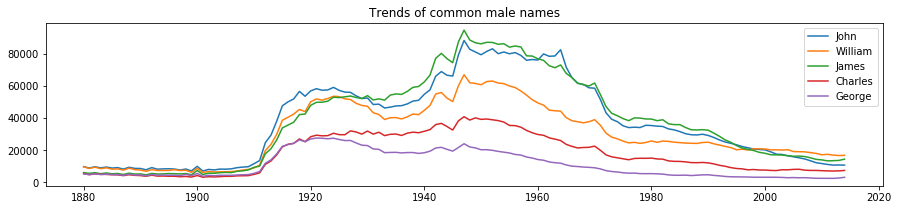

In [36]:
male_names = ['John','William','James','Charles','George']
plt.figure(figsize=(15,3))
for name in male_names:
    occ_year = names_all_indexed.loc['M',name].reset_index()
    plt.plot(occ_year.year,occ_year.occurences)
plt.legend(male_names)    
plt.title('Trends of common male names')

Text(0.5,1,'Trends of common female names')

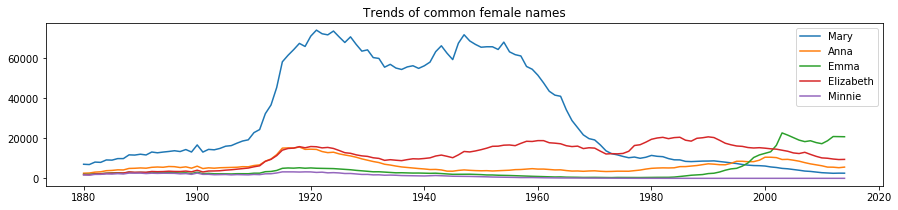

In [37]:
fmale_names = ['Mary','Anna','Emma','Elizabeth','Minnie']
plt.figure(figsize=(15,3))
for name in fmale_names:
    occ_year = names_all_indexed.loc['F',name].reset_index()
    plt.plot(occ_year.year,occ_year.occurences)
plt.legend(fmale_names) 
plt.title('Trends of common female names')

### Trends of similar names

In [38]:
name_variations = ['Catherine','Katherine','Kathleen','Katrina','Kathryn']

In [39]:
for name in name_variations:
    if name in names_all_indexed.index.get_level_values('name'):
        print ('True')
    else: print ('False')

True
True
True
True
True


Text(0.5,1,'Trend for similar names')

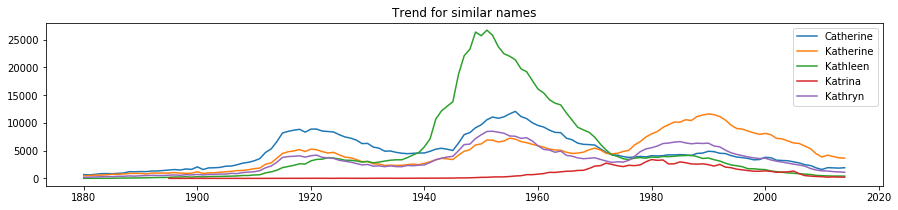

In [40]:
plt.figure(figsize=(15,3))
for name in name_variations:
    occ_year = names_all_indexed.loc['F',name].reset_index()
    plt.plot(occ_year.year,occ_year.occurences)
plt.legend(name_variations)
plt.title('Trend for similar names')

In [41]:
variants = names_all_indexed.loc['F'].loc[name_variations].unstack(level=0).fillna(0)

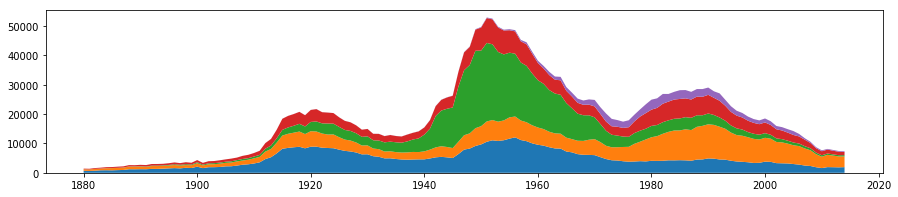

In [42]:
plt.figure(figsize=(15,3))

plt.stackplot(variants.index,variants.values.T )

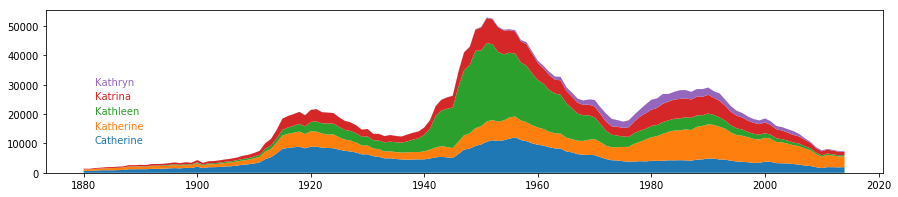

In [43]:
plt.figure(figsize=(15,3))


palette = sns.color_palette()
plt.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(name_variations):
    plt.text(1882,10000 + 5000*i,name,color=palette[i])

### Listing the top ten from each year

In [44]:
top_ten_2012 = names_all_indexed.loc[('M',slice(None),2012),]
top_ten_2012.head()

occurences
sex name    year           
M   Aaban   2012         11
    Aadam   2012         11
    Aadan   2012         11
    Aadarsh 2012         12
    Aaden   2012        223

In [45]:
top_ten_2012 = top_ten_2012.sort_values('occurences',ascending=False)
top_ten_2012.head()

occurences
sex name    year           
M   Jacob   2012      19030
    Mason   2012      18943
    Ethan   2012      17635
    Noah    2012      17302
    William 2012      16844

In [46]:
top_ten_2012 = top_ten_2012.reset_index().drop(['sex','year','occurences'],axis = 1).head()
top_ten_2012.columns = ['2012']
top_ten_2012.head(10)

,2012
0,Jacob
1,Mason
2,Ethan
3,Noah
4,William


In [47]:
def top_ten_year(sex,year):
    top_ten = names_all_indexed.loc[(sex,slice(None),year),]
    top_ten = top_ten.sort_values('occurences',ascending=False)
    top_ten = top_ten.reset_index().drop(['sex','year','occurences'],axis = 1)
    top_ten.columns = [str(year)]
    return top_ten.head(10)

In [48]:
top_ten_year('M',2012)

,2012
0,Jacob
1,Mason
2,Ethan
3,Noah
4,William
5,Liam
6,Michael
7,Jayden
8,Alexander
9,Aiden


### Function to produce top ten list for range of given years

In [49]:
def top_tens(sex,year1,year2):
    top_ten_years = []
    if year1<= year2:
        for i in range(year1,year2+1):
            top_ten_years.append(top_ten_year(sex,i))
        return top_ten_years[0].join(top_ten_years[1:])
    else:
        raise ValueError('The 2nd year cannot be smaller than 1st year')

In [50]:
top_tens('M',2005,2014)    

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
1,Michael,Michael,Michael,Michael,Ethan,Ethan,Mason,Mason,Liam,Liam
2,Joshua,Joshua,Ethan,Ethan,Michael,Michael,William,Ethan,Jacob,Mason
3,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
4,Ethan,Matthew,Daniel,Daniel,William,William,Noah,William,William,William
5,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
6,Daniel,Andrew,Anthony,William,Daniel,Noah,Ethan,Michael,Michael,Michael
7,Anthony,Christopher,William,Anthony,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
8,Joseph,Anthony,Matthew,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
9,Christopher,William,Andrew,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


In [51]:
top_tens('M',2013,2011)     ## Error as 2013 > 2011. 

ValueError: The 2nd year cannot be smaller than 1st year

In [52]:
top_tens('F',1985,1994)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
0,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica
1,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley
2,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily
3,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha
4,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah
5,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor
6,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany
7,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda
8,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth
9,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan


In [53]:
top_tens('F',1985,1994).stack().head(10)

0  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
   1990    Jessica
   1991     Ashley
   1992     Ashley
   1993    Jessica
   1994    Jessica
dtype: object

In [54]:
top_tens('F',1985,1994).stack().value_counts().head(5)

Jessica      10
Ashley       10
Amanda       10
Elizabeth    10
Sarah        10
dtype: int64

### Most popular names in a year range

In [55]:
def names_pop(sex,year1,year2):
    return top_tens(sex,year1,year2).stack().value_counts().head(5).index[:6]

Text(0.5,1,'Trend of female names popular between 1985 and 1994')

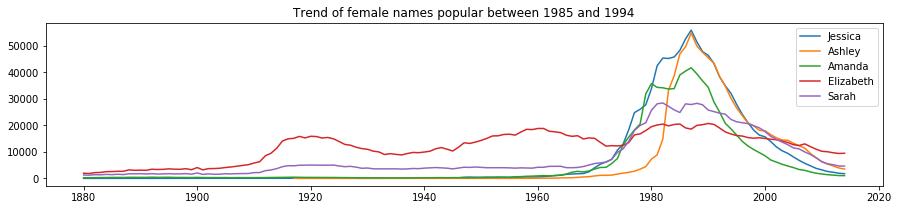

In [56]:
popular_names = names_pop('F',1985,1994)
plt.figure(figsize=(15,3))
for name in popular_names:
    occ_year = names_all_indexed.loc['F',name].reset_index()
    plt.plot(occ_year.year,occ_year.occurences)
plt.legend(popular_names) 
plt.title('Trend of female names popular between 1985 and 1994')

## Trend of names which are unisex

In [57]:
totals = names_all.groupby(['sex','name'])['occurences'].sum()
totals.unstack('sex').head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [58]:
totals.unstack('sex').dropna(axis=0,how ='any').head()

sex,F,M
name,,
Aaden,5.0,3915.0
Aadi,16.0,667.0
Aadyn,16.0,387.0
Aalijah,107.0,155.0
Aaliyah,69833.0,84.0


In [59]:
totals_both_sex = totals.unstack('sex').dropna(axis=0,how ='any')
totals_both_sex['both'] = totals_both_sex['F'] + totals_both_sex['M']
totals_both_sex = totals_both_sex[(totals_both_sex.F/totals_both_sex.M < 1.5) & (totals_both_sex.F/totals_both_sex.M > 0.85)]
totals_both_sex.sort_values('both',ascending=False).head(5)

sex,F,M,both
name,,,
Riley,81605.0,87494.0,169099.0
Jackie,90337.0,78148.0,168485.0
Peyton,58567.0,44037.0,102604.0
Kerry,48452.0,49417.0,97869.0
Robbie,22215.0,20676.0,42891.0


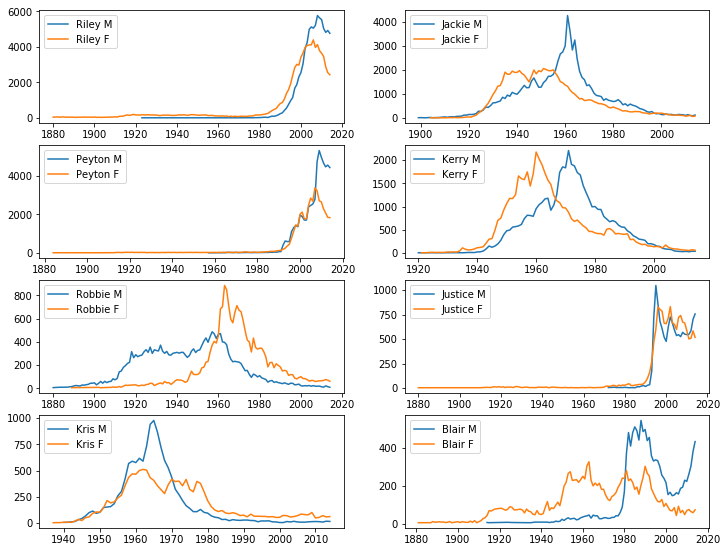

In [60]:
common_in_both_sex = totals_both_sex.sort_values('both',ascending=False).head(8)
names = common_in_both_sex.index.values
plt.figure(figsize=(12,12))

for i,name in enumerate(names):
    plt.subplot(5,2,i+1)
    
    
    occ_year = names_all_indexed.loc['F',name].reset_index()
    plt.plot(occ_year.year,occ_year.occurences)
    
    occ_year = names_all_indexed.loc['M',name].reset_index()
    plt.plot(occ_year.year,occ_year.occurences)
    
    
    plt.legend([name + ' M',name + ' F'],loc='upper left')

## Tracking sudden rise in name popularity

In [61]:
def sumsq(x):
    return sum(x**2)

In [62]:
spikyness = names_all.groupby(['sex','name'])['occurences'].agg(sumsq) / totals**2

In [63]:
spiky_common = spikyness[totals > 5000].copy()
spiky_common = spiky_common.reset_index()
spiky_common = spiky_common.sort_values('occurences',ascending=False)
spiky_common.head(5)

,sex,name,occurences
2904,M,Iker,0.199368
3536,M,Shaquille,0.195689
2963,M,Jase,0.182165
12,F,Adalynn,0.177107
831,F,Harper,0.164827


In [64]:
spiky_common.tail(5)

,sex,name,occurences
1834,F,Rosa,0.008512
1630,F,Mollie,0.008437
2903,M,Ike,0.008310
556,F,Delia,0.008263
1396,F,Louisa,0.007931


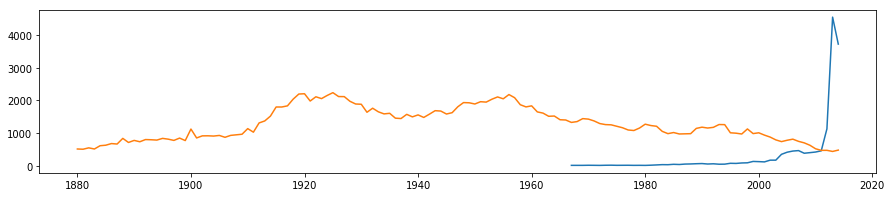

In [65]:
plt.figure(figsize=(15,3))

occ_year = names_all_indexed.loc['M','Jase'].reset_index()
plt.plot(occ_year.year,occ_year.occurences)
occ_year = names_all_indexed.loc['F','Rosa'].reset_index()
plt.plot(occ_year.year,occ_year.occurences)